In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
MovieReview = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [4]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')

In [6]:
df.shape

(15509, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


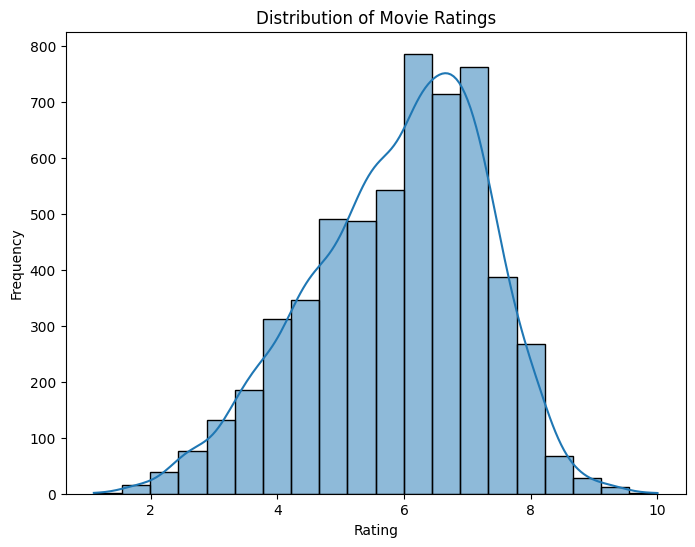

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


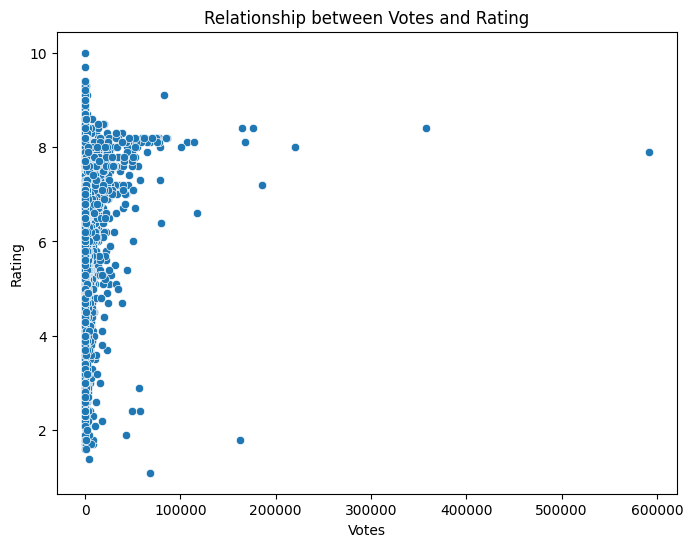

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Relationship between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


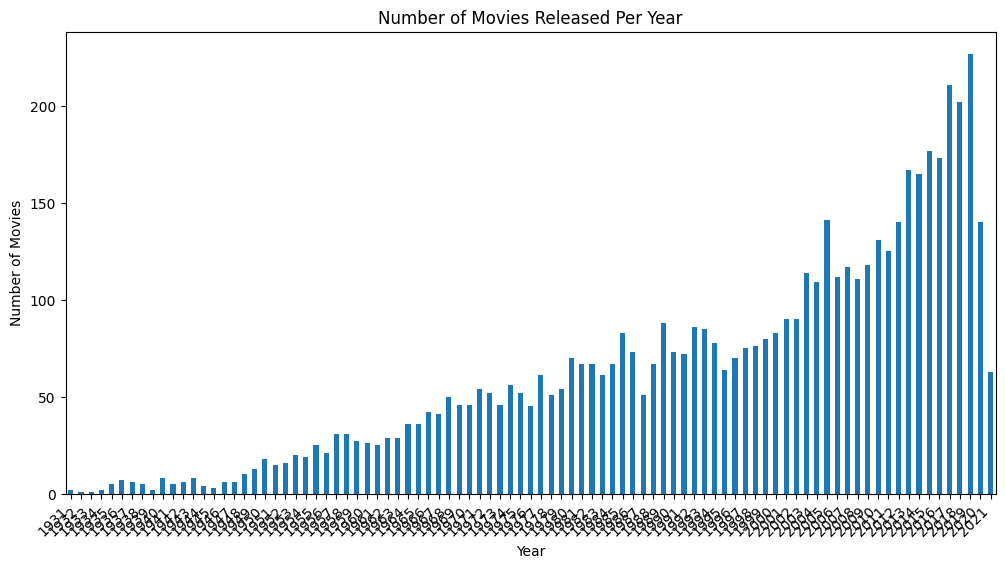

In [16]:
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


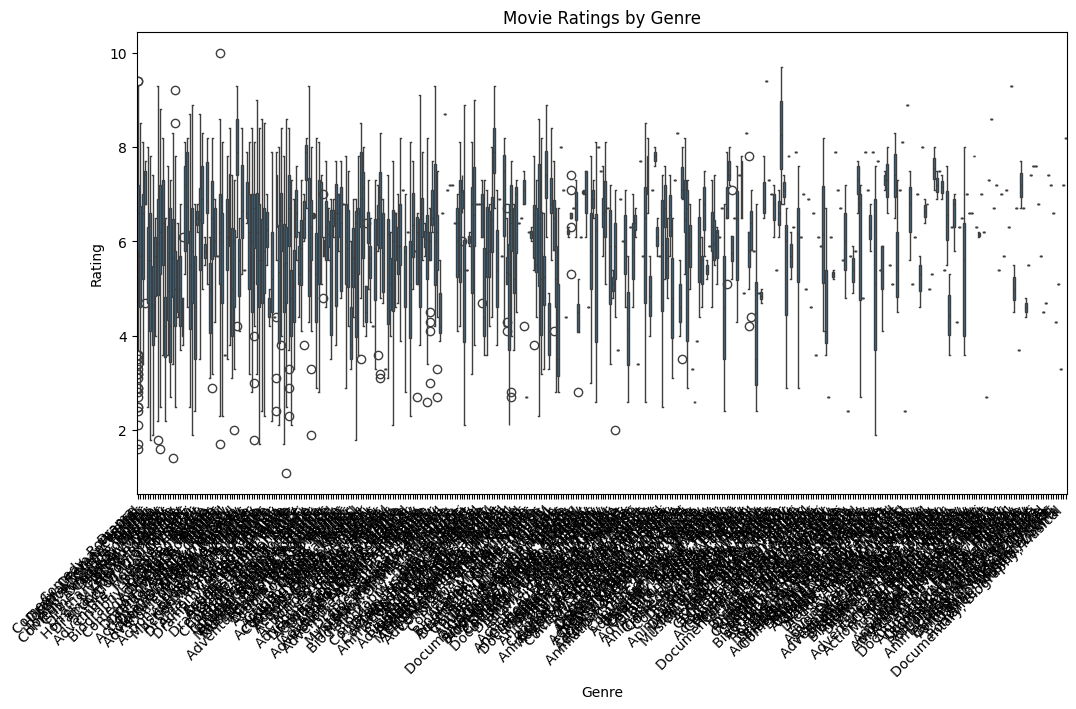

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

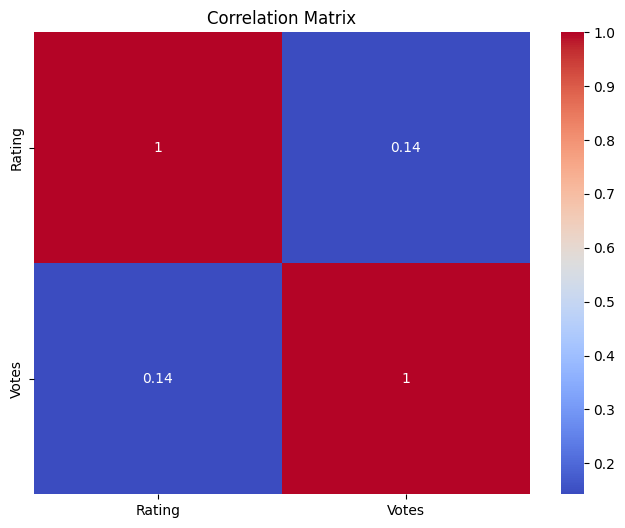

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Rating', 'Votes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

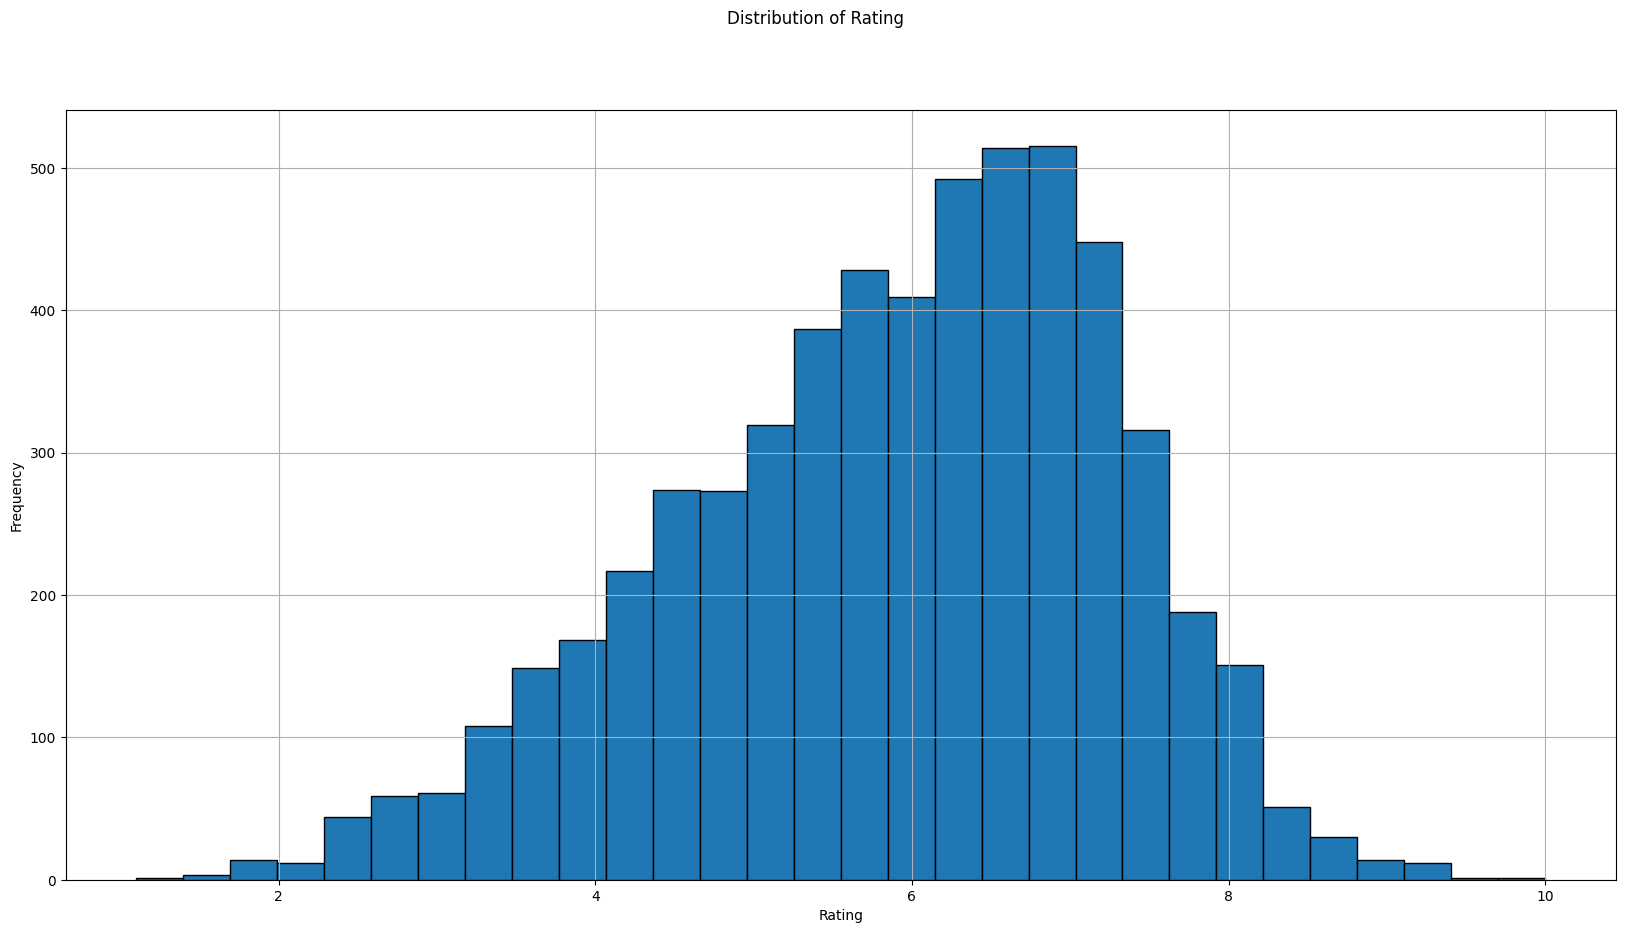

In [25]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(20, 10))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

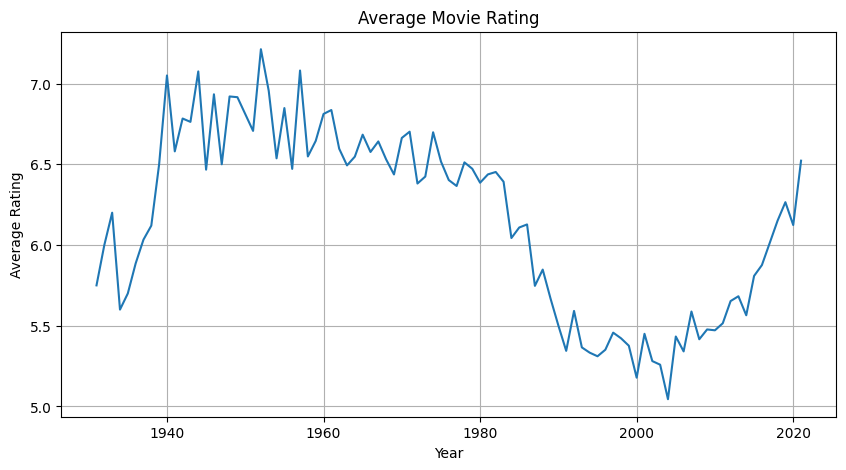

In [24]:
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']


plt.figure(figsize=(10, 5))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating')
plt.grid(True)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4527, 2)
X_test shape: (1132, 2)
y_train shape: (4527,)
y_test shape: (1132,)


In [48]:
model = LinearRegression()


In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)


In [51]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.7099742410753835


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [54]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
y_pred = rf_model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [57]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.7080929542765513
R-squared: 0.0775759064462056


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [60]:
print("Performance Evaluation for Linear Regression Model:")
print("Mean squared error value is:", mse_lr)
print("Mean absolute error value is:", mae_lr)
print("R2 score value is:", r2_lr)


Performance Evaluation for Linear Regression Model:
Mean squared error value is: 1.7099742410753835
Mean absolute error value is: 1.0637797476308166
R2 score value is: 0.07655995221152379


In [61]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [62]:
print("\nPerformance Evaluation for Random Forest Model:")
print("Mean squared error value is:", mse_rf)
print("Mean absolute error value is:", mae_rf)
print("R2 score value is:", r2_rf)


Performance Evaluation for Random Forest Model:
Mean squared error value is: 1.7080929542765513
Mean absolute error value is: 0.9824250926610687
R2 score value is: 0.0775759064462056


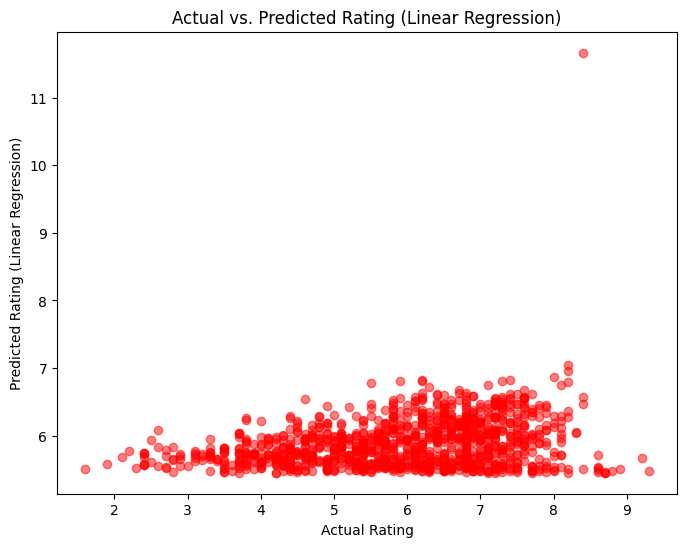

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating (Linear Regression)')
plt.title('Actual vs. Predicted Rating (Linear Regression)')
plt.show()

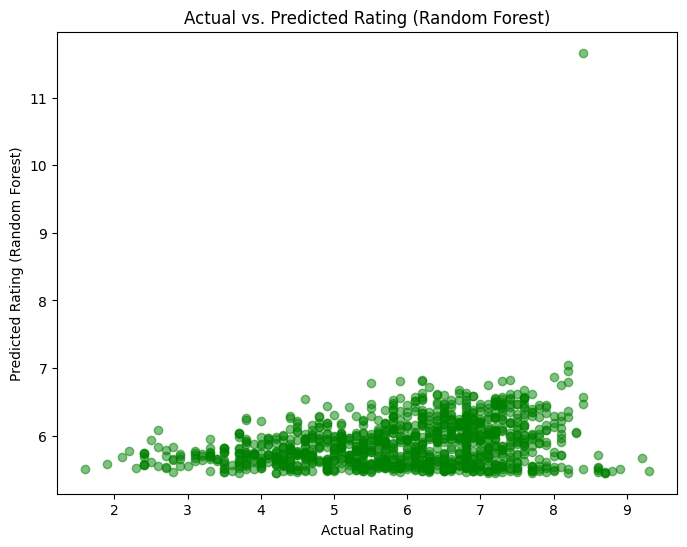

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='green')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating (Random Forest)')
plt.title('Actual vs. Predicted Rating (Random Forest)')
plt.show()

In [71]:
new_data = pd.DataFrame({
    'Votes': [10000, 50000, 20000],  # Example vote counts
    'Year': [2023, 2022, 2021]  # Example years
})

In [72]:
predicted_ratings_rf = rf_model.predict(new_data)

In [73]:
print("Predicted Ratings (Random Forest):", predicted_ratings_rf)

Predicted Ratings (Random Forest): [6.19  5.652 6.794]


In [74]:
predicted_ratings_lr = model.predict(new_data)

In [75]:
print("Predicted Ratings (Linear Regression):", predicted_ratings_lr)

Predicted Ratings (Linear Regression): [5.58862807 6.27737866 5.78870323]


In [80]:
#Predicting rating using trial data with movie names "A Thursday" "Viraat" "Dus"

movie_names = ["A Thursday", "Viraat", "Dus"]
trial_data = df[df['Name'].isin(movie_names)]

X_trial = trial_data[['Votes', 'Year']]

predicted_ratings_rf = rf_model.predict(X_trial)
predicted_ratings_lr = model.predict(X_trial)

print("Predicted Ratings (Random Forest):", predicted_ratings_rf)
print("Predicted Ratings (Linear Regression):", predicted_ratings_lr)

print("\nPredicted Ratings with Movie Names:")
for index, row in trial_data.iterrows():
    movie_name = row['Name']

    # Get the corresponding prediction index
    prediction_index = trial_data.index.get_loc(index)

    # Access predicted ratings using prediction_index, if it exists
    predicted_rating_rf = predicted_ratings_rf[prediction_index] if prediction_index < len(predicted_ratings_rf) else None
    predicted_rating_lr = predicted_ratings_lr[prediction_index] if prediction_index < len(predicted_ratings_lr) else None

    # Printing the results
    print(f"Movie: {movie_name}, Predicted Rating (Random Forest): {predicted_rating_rf:.2f}")
    print(f"Movie: {movie_name}, Predicted Rating (Linear Regression): {predicted_rating_lr:.2f}")

Predicted Ratings (Random Forest): [7.821]
Predicted Ratings (Linear Regression): [5.45724098]

Predicted Ratings with Movie Names:
Movie: Viraat, Predicted Rating (Random Forest): 7.82
Movie: Viraat, Predicted Rating (Linear Regression): 5.46
